# EN3160 Assignment 1

### I.P.D.D.Rajapaksha
### 210503H
### github repository link: https://github.com/DinethraDivanjana2001/EN3166-Image-processing-and-machine-vision/tree/main

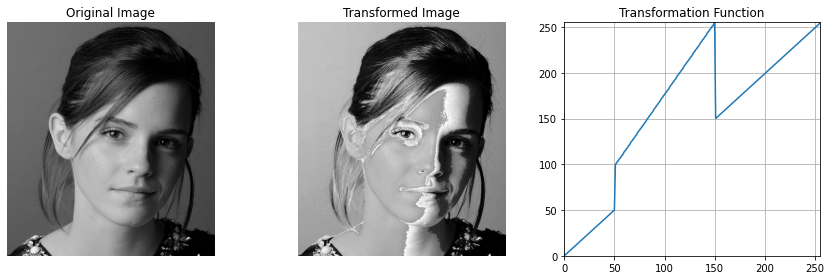

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')   
t2 = np.linspace(c[0, 1], c[1, 1], c[1, 0] - c[0, 0]).astype('uint8') 
t3 = np.linspace(c[1, 1], c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')  
t4 = np.linspace(c[2, 1], c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')  
t5 = np.linspace(c[3, 1], 255, 255 - c[3, 0]).astype('uint8')  
transform = np.concatenate((t1, t2, t3, t4, t5))
f = cv.imread('a1images\emma.jpg', cv.IMREAD_GRAYSCALE)  
g = transform[f]
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
ax[1].axis('off')

ax[2].plot(transform)
ax[2].set_ylim([0, 255])
ax[2].set_xlim([0, 255])
ax[2].set_title('Transformation Function')
ax[2].grid(True) 

plt.tight_layout()
plt.show()


White Matter Intensity: 166, Range: (154, 177)
Gray Matter Intensity: 215, Range: (199, 230)


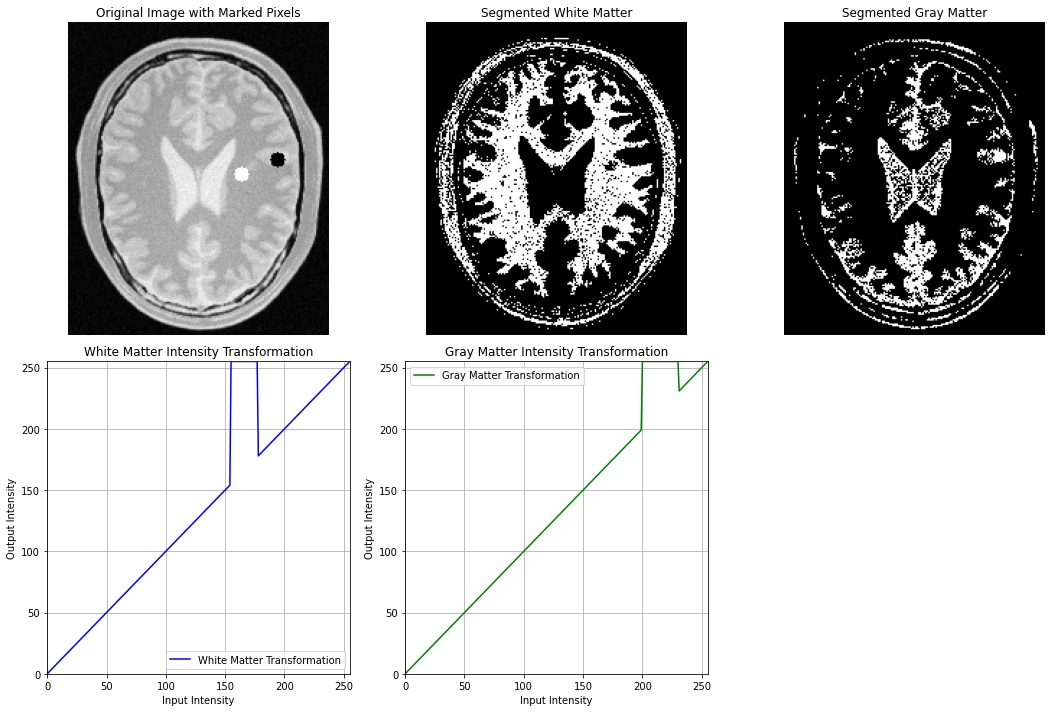

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = r'D:\EN3166-Image-processing-and-machine-vision\EN3166-Image-processing-and-machine-vision\Image processing assignment\a1images\brain_proton_density_slice.png'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

if image is None:
    print(f"Error: Could not load image from path '{image_path}'. Please check the file path.")
else:
    white_matter_coords = [(120, 105)]  
    gray_matter_coords = [(145, 95)]    

    range_percent = 7 
    def calculate_intensity_range(intensity):
        lower_bound = int(intensity - (intensity * range_percent / 100))
        upper_bound = int(intensity + (intensity * range_percent / 100))
        return lower_bound, upper_bound
    white_matter_intensity = image[white_matter_coords[0][1], white_matter_coords[0][0]]
    gray_matter_intensity = image[gray_matter_coords[0][1], gray_matter_coords[0][0]]
    white_range = calculate_intensity_range(white_matter_intensity)
    gray_range = calculate_intensity_range(gray_matter_intensity)

    print(f'White Matter Intensity: {white_matter_intensity}, Range: {white_range}')
    print(f'Gray Matter Intensity: {gray_matter_intensity}, Range: {gray_range}')

    white_mask = (image >= white_range[0]) & (image <= white_range[1])
    gray_mask = (image >= gray_range[0]) & (image <= gray_range[1])

    segmented_white = np.zeros_like(image)
    segmented_white[white_mask] = 255  
    segmented_gray = np.zeros_like(image)
    segmented_gray[gray_mask] = 255  

    cv.circle(image, white_matter_coords[0], 5, (255, 0, 0), -1)  
    cv.circle(image, gray_matter_coords[0], 5, (0, 0, 255), -1)   
    t_white = np.zeros(256, dtype=np.uint8)
    t_gray = np.zeros(256, dtype=np.uint8)

    for i in range(256):
        if i <= white_range[0]:
            t_white[i] = i  
        elif i <= white_range[1]:
            t_white[i] = 255  
        else:
            t_white[i] = i  
    for i in range(256):
        if i <= gray_range[0]:
            t_gray[i] = i  
        elif i <= gray_range[1]:
            t_gray[i] = 255  
        else:
            t_gray[i] = i  
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image with Marked Pixels')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(segmented_white, cmap='gray', vmin=0, vmax=255)
    plt.title('Segmented White Matter')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(segmented_gray, cmap='gray', vmin=0, vmax=255)
    plt.title('Segmented Gray Matter')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.plot(t_white, label='White Matter Transformation', color='blue')
    plt.title('White Matter Intensity Transformation')
    plt.xlabel('Input Intensity')
    plt.ylabel('Output Intensity')
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.grid()
    plt.legend()

    plt.subplot(2, 3, 5)
    plt.plot(t_gray, label='Gray Matter Transformation', color='green')
    plt.title('Gray Matter Intensity Transformation')
    plt.xlabel('Input Intensity')
    plt.ylabel('Output Intensity')
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()


White Matter Intensity: 166, Range: (154, 177)
Gray Matter Intensity: 215, Range: (199, 230)
Exclude Intensity: 231, Range: (214, 247)


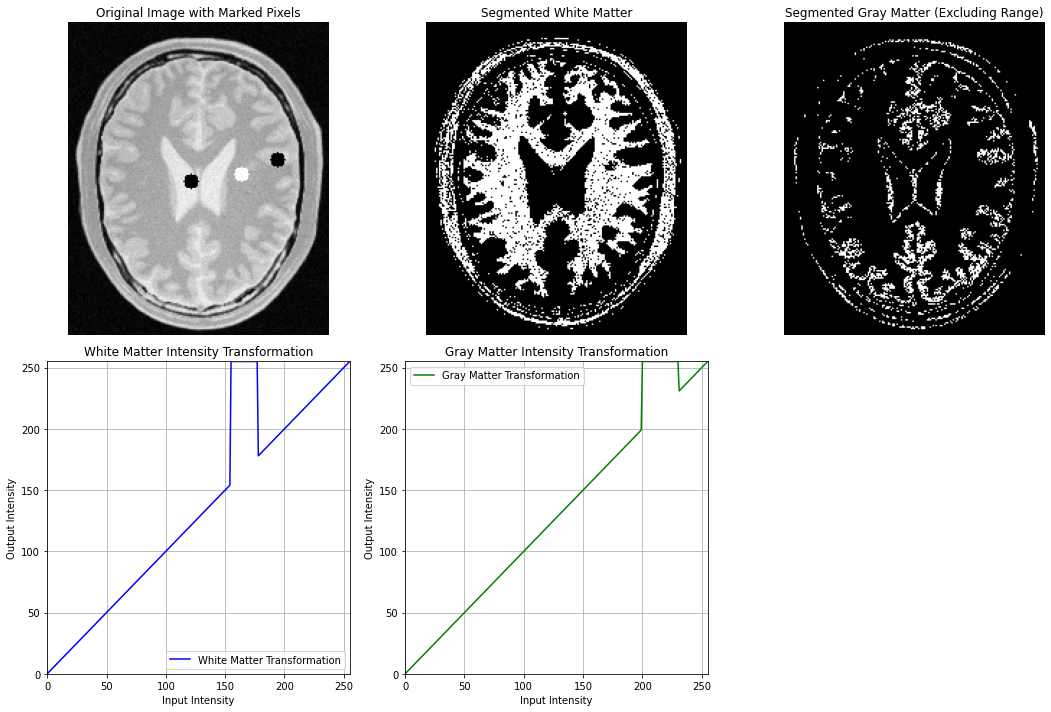

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = r'D:\EN3166-Image-processing-and-machine-vision\EN3166-Image-processing-and-machine-vision\Image processing assignment\a1images\brain_proton_density_slice.png'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

if image is None:
    print(f"Error: Could not load image from path '{image_path}'. Please check the file path.")
else:
    white_matter_coords = [(120, 105)]  
    gray_matter_coords = [(145, 95)]    
    exclude_gray_coords = [(85, 110)]  

    range_percent = 7  

    def calculate_intensity_range(intensity):
        lower_bound = int(intensity - (intensity * range_percent / 100))
        upper_bound = int(intensity + (intensity * range_percent / 100))
        return lower_bound, upper_bound
    
    white_matter_intensity = image[white_matter_coords[0][1], white_matter_coords[0][0]]
    gray_matter_intensity = image[gray_matter_coords[0][1], gray_matter_coords[0][0]]
    exclude_gray_intensity = image[exclude_gray_coords[0][1], exclude_gray_coords[0][0]]

    white_range = calculate_intensity_range(white_matter_intensity)
    gray_range = calculate_intensity_range(gray_matter_intensity)
    exclude_gray_range = calculate_intensity_range(exclude_gray_intensity)

    print(f'White Matter Intensity: {white_matter_intensity}, Range: {white_range}')
    print(f'Gray Matter Intensity: {gray_matter_intensity}, Range: {gray_range}')
    print(f'Exclude Intensity: {exclude_gray_intensity}, Range: {exclude_gray_range}')

    white_mask = (image >= white_range[0]) & (image <= white_range[1])
    gray_mask = (image >= gray_range[0]) & (image <= gray_range[1])
    exclude_mask = (image >= exclude_gray_range[0]) & (image <= exclude_gray_range[1])

    segmented_white = np.zeros_like(image)
    segmented_white[white_mask] = 255 
    segmented_gray = np.zeros_like(image)
    segmented_gray[gray_mask] = 255  
    segmented_gray[exclude_mask] = 0 

    cv.circle(image, white_matter_coords[0], 5, (255, 0, 0), -1)  
    cv.circle(image, gray_matter_coords[0], 5, (0, 0, 255), -1)   
    cv.circle(image, exclude_gray_coords[0], 5, (0, 255, 0), -1)  

    t_white = np.zeros(256, dtype=np.uint8)
    t_gray = np.zeros(256, dtype=np.uint8)

    for i in range(256):
        if i <= white_range[0]:
            t_white[i] = i  
        elif i <= white_range[1]:
            t_white[i] = 255 
        else:
            t_white[i] = i  
    for i in range(256):
        if i <= gray_range[0]:
            t_gray[i] = i  
        elif i <= gray_range[1]:
            t_gray[i] = 255  
        else:
            t_gray[i] = i 

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image with Marked Pixels')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(segmented_white, cmap='gray', vmin=0, vmax=255)
    plt.title('Segmented White Matter')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(segmented_gray, cmap='gray', vmin=0, vmax=255)
    plt.title('Segmented Gray Matter (Excluding Range)')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.plot(t_white, label='White Matter Transformation', color='blue')
    plt.title('White Matter Intensity Transformation')
    plt.xlabel('Input Intensity')
    plt.ylabel('Output Intensity')
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.grid()
    plt.legend()

    plt.subplot(2, 3, 5)
    plt.plot(t_gray, label='Gray Matter Transformation', color='green')
    plt.title('Gray Matter Intensity Transformation')
    plt.xlabel('Input Intensity')
    plt.ylabel('Output Intensity')
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()


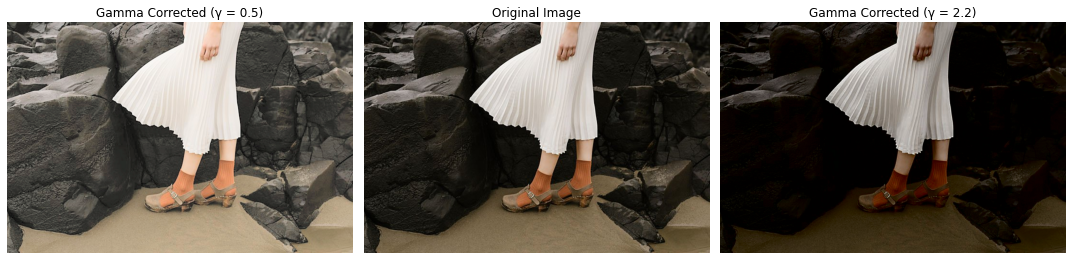

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


image_path = r'a1images\highlights_and_shadows.jpg'
image = cv.imread(image_path)


lab_img = cv.cvtColor(image, cv.COLOR_BGR2Lab)
L, A, B = cv.split(lab_img)
L = L / 255.0


gamma_low = 0.5
L_gamma_corrected_low = np.power(L, gamma_low)
L_gamma_corrected_low = np.uint8(L_gamma_corrected_low * 255)
lab_gamma_corrected_low = cv.merge((L_gamma_corrected_low, A, B))
gamma_corrected_img_low = cv.cvtColor(lab_gamma_corrected_low, cv.COLOR_Lab2BGR)


gamma_high = 2.2
L_gamma_corrected_high = np.power(L, gamma_high)
L_gamma_corrected_high = np.uint8(L_gamma_corrected_high * 255)
lab_gamma_corrected_high = cv.merge((L_gamma_corrected_high, A, B))
gamma_corrected_img_high = cv.cvtColor(lab_gamma_corrected_high, cv.COLOR_Lab2BGR)


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))


axs[1].set_title("Original Image")
axs[1].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
axs[1].axis('off')

axs[0].set_title("Gamma Corrected (γ = 0.5)")
axs[0].imshow(cv.cvtColor(gamma_corrected_img_low, cv.COLOR_BGR2RGB))
axs[0].axis('off')

axs[2].set_title("Gamma Corrected (γ = 2.2)")
axs[2].imshow(cv.cvtColor(gamma_corrected_img_high, cv.COLOR_BGR2RGB))
axs[2].axis('off')


plt.tight_layout()
plt.show()


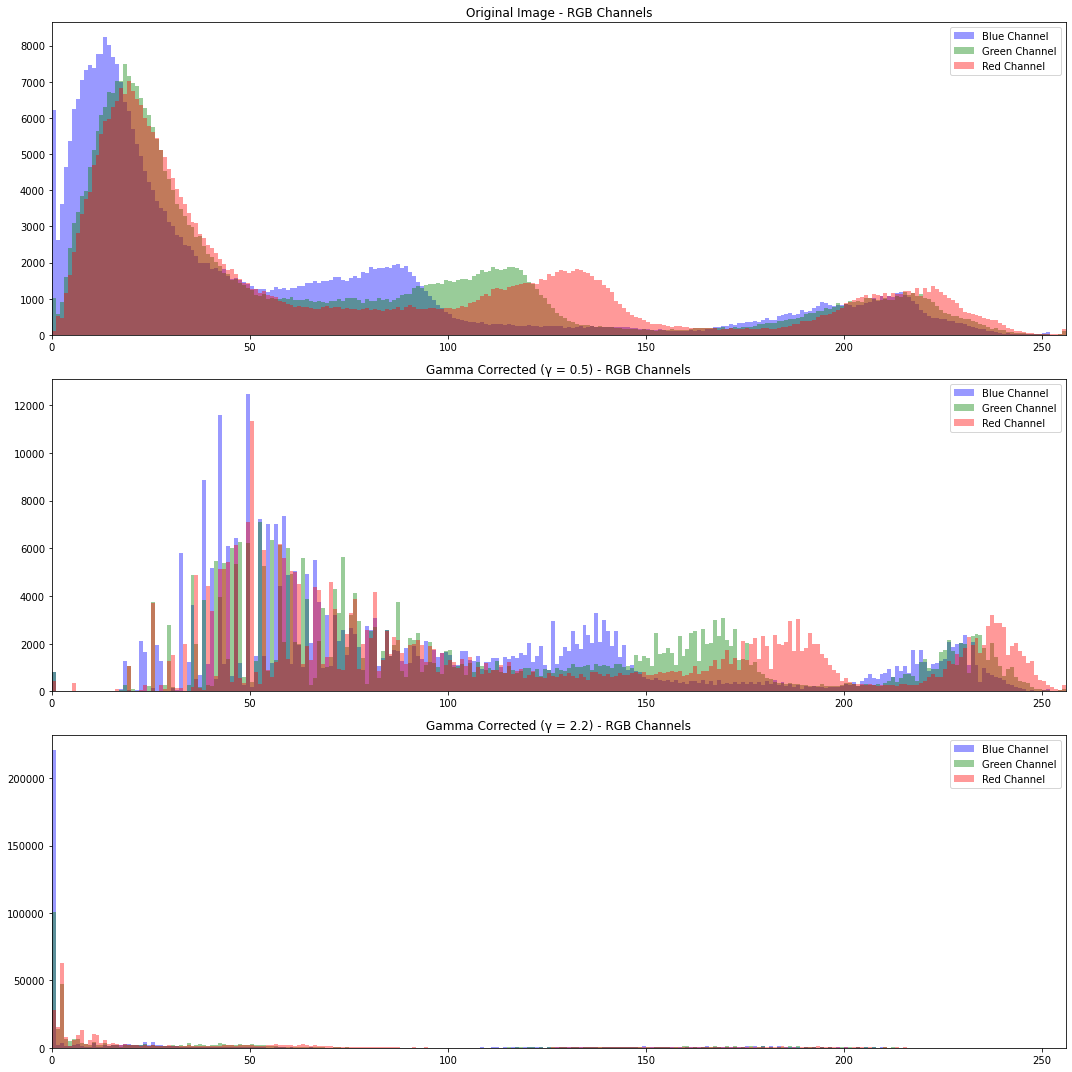

In [2]:
def plot_histograms(original_image, corrected_image_low, corrected_image_high):
  
    b_orig, g_orig, r_orig = cv.split(original_image)
    b_low, g_low, r_low = cv.split(corrected_image_low)
    b_high, g_high, r_high = cv.split(corrected_image_high)

    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

    axs[0].set_title("Original Image - RGB Channels")
    axs[0].hist(b_orig.ravel(), bins=256, range=[0, 256], color='b', alpha=0.4, label='Blue Channel')
    axs[0].hist(g_orig.ravel(), bins=256, range=[0, 256], color='g', alpha=0.4, label='Green Channel')
    axs[0].hist(r_orig.ravel(), bins=256, range=[0, 256], color='r', alpha=0.4, label='Red Channel')
    axs[0].set_xlim([0, 256])
    axs[0].legend()


    axs[1].set_title("Gamma Corrected (γ = 0.5) - RGB Channels")
    axs[1].hist(b_low.ravel(), bins=256, range=[0, 256], color='b', alpha=0.4, label='Blue Channel')
    axs[1].hist(g_low.ravel(), bins=256, range=[0, 256], color='g', alpha=0.4, label='Green Channel')
    axs[1].hist(r_low.ravel(), bins=256, range=[0, 256], color='r', alpha=0.4, label='Red Channel')
    axs[1].set_xlim([0, 256])
    axs[1].legend()


    axs[2].set_title("Gamma Corrected (γ = 2.2) - RGB Channels")
    axs[2].hist(b_high.ravel(), bins=256, range=[0, 256], color='b', alpha=0.4, label='Blue Channel')
    axs[2].hist(g_high.ravel(), bins=256, range=[0, 256], color='g', alpha=0.4, label='Green Channel')
    axs[2].hist(r_high.ravel(), bins=256, range=[0, 256], color='r', alpha=0.4, label='Red Channel')
    axs[2].set_xlim([0, 256])
    axs[2].legend()

    plt.tight_layout()
    plt.show()
plot_histograms(image, gamma_corrected_img_low, gamma_corrected_img_high)
